In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
def credits_fig_pval():
    """
    Derived from dialog with perplexity.ai
    - switched its output to object-oriented matplotlib style

    create python code using matplotlib to illustrate the statistical concept of p value

    not quite what I wanted. Create a normal distribution and a single point on the x-axis. Illustrate what the p value is

    please use an observed value of 2

    can you label the observed value as the t-stat
    """

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

visible = False

# Set the mean and standard deviation for the normal distribution
mean = 0
std_dev = 1

# Generate x values for the normal distribution
x = np.linspace(-4, 4, 100)
# Generate the normal distribution
y = stats.norm.pdf(x, mean, std_dev)

# Create the plot for the normal distribution
fig_pval, ax = plt.subplots(1,1, figsize=(10,6))
_= ax.plot(x, y, label='Normal Distribution')

# Add a vertical line to represent the observed value
observed_value = 2
_= ax.axvline(x=observed_value, color='r', linestyle='dashed', linewidth=2, label=f'T-Stat: {observed_value}')

# Shade the area in the tail of the distribution corresponding to the p-value
if observed_value < mean:
    p_value = 2 * stats.norm.cdf(observed_value, mean, std_dev)  # For a two-tailed test
    _= ax.fill_between(x, 0, y, where=(x <= observed_value), color='red', alpha=0.3, label='P-Value Area')
else:
    p_value = 2 * (1 - stats.norm.cdf(observed_value, mean, std_dev))  # For a two-tailed test
    _= ax.fill_between(x, 0, y, where=(x >= observed_value), color='red', alpha=0.3, label='P-Value Area')

# Add text to display the p-value on the plot
_= ax.text(-3.5, 0.25, f'P-Value: {p_value:.4f}', fontsize=12)

# Set plot labels and title
_= ax.set_xlabel('X')
_= ax.set_ylabel('Probability Density')
_= ax.set_title('Illustration of P-Value with Normal Distribution')

# Show the plot with legend
_= ax.legend()


if not visible:
    plt.close()


# Linear Regression

We have thus far concentrated on the "surface level" aspects of Linear Regression.


That is, we focused on the equation
$$
\hat \y = \Theta \cdot \x
$$

But we have not considered how to interpret, or analyze the utility, of individual features $\x_j$.



# Magnitude of $\Theta_j$

Does a large value of a coefficient $\Theta_j$ mean the associated feature $\x_j$ is "important" ?

No !

Consider the true model
$$\pdata(\y \; | \; \x)$$
is
$$
\y = \Theta_1 * \x_1
$$

What happens if I change the magnitude of $\x$
- e.g., from units of "dollars" to units of "thousands of dollars"
$$
\x'_1 = \frac{\x_1}{1000}
$$

The relationship becomes
$$
\begin{array} \\
\y & = & (\Theta_1 * 1000) * \frac{\x_1}{1000} & \text{coefficient increases to offset decrease in feature} \\
   & = & \Theta'_1 * \x'_1 & \text{where } \Theta'_1 = \Theta_1 * 1000 \\
\end{array}
$$

Re-denominating the feature $\x_1$ 
- causes the coefficient to increase by a factor of 1000
- but does not change the fundamental underlying relationship
    - a unit change in $\x_1$ (equivalently: a change in $\x'_1$ of $.001$)
    - changes prediction $\y$ by $\Theta_1$

The larger $\Theta'_1$ is no more important than $\Theta_1$.

That is
- the magnitude of a coefficient
- depends on the magnitude of the feature

Don't conflate magnitude with importance.


Mathematically
$$
\begin{array} \\
\Theta_j & = & \frac{\partial \y}{\partial \x_j} \\
\Theta_{j'} & = & \frac{\partial \y}{\partial \x_{j'}} \\
\end{array}
$$

So a unit change in $\x_j$ 
- causes a larger change in $\y$ 
- than a unit change in $\x_{j'}$
- when $\Theta_j \gt \Theta_{j'}$

But the larger "impact" on $\y$ does not make feature $\x_j$ more "important".

This is critical when we have more than one feature
- $\Theta_j \gt \Theta_{j'}$ may be an *artifact* of $\x_j$ and $\x_{j'}$ being on different scales
- **not** an indication of greater importance of feature $\x_j$ versus feature $\x_{j'}$

## Regularization

In fitting a Linear Regression model
- adding more features won't adversely affect Loss
- but might adversely affect out-of-sample generalization

An irrelevant feature won't increase in-sample Loss.

But it might capture meaningless "noise" in the training data
- that causes out-of-sample prediction to become worse

So we need to trade-off 
- the desire to include potentially relevant features
- with the potential adverse impact on generalization

One attempt at managing this trade-off is via *Regularization*.

Recall that we can add a *regularization* term to the Loss Function $\loss$ for Linear Regression
- a *penalty* term
- that forces parameters coefficients toward 0

For example uses the penalty, the standard MSE loss
$$
\loss_\text{MSE} = \frac{1}{m} \sum_{i=1}^m { (\y^\ip - \Theta \cdot \x)^2 }
$$

can be augmented with a penalty

$$
Q = \sum_{n=1}^N \Theta_n^2
$$
to give the loss
$$
\loss = \loss_\text{MSE} + \lambda Q
$$

Regularization is an attempt
- to not prematurely exclude a potentially important feature
- but to omit it "after the fact" by forcing its coefficient to zero

Hyper-parameter $\lambda$ expresses a trade-off between
- reducing the magnitude of $\Theta$
- and the resulting increase in $\loss_\text{MSE}$

Beware !

The coefficients that are made smaller by regularization
- do not necessarily correspond to "unimportant" features


As we have observed above,
special attention should be paid
- to the *scale* of each feature
- when Regularization will be applied
- as the scale of the corresponding parameter moves inversely to the scale of the feature

# Statistical significance of $\Theta_j$

Consider the true model
$$\pdata(\y \; | \; \x)$$
is
$$
\y = \Theta * \x_1
$$

In general
- we **don't know** the true model
- we only have access to the training dataset $\langle \X, \y \rangle$
- which is a *sample* from the true model joint distribution of $\y$ and $\x$
- and we hypothesize (and test) theories for what the true model is

The $\Theta^*$ obtained from fitting a model to the training dataset
- depends on the particular sample $\langle \X, \y \rangle$ we observe in the training dataset
- a different sample would lead to a different $\Theta^*$

By drawing many possible samples of $\langle \X, \y \rangle$ from the true $\pdata(\y \; | \; \x)$
- we can estimate a *distribution* of the values for $\Theta^*$ we obtain by fitting

That is
- our fitting is an *estimate* of the true $\Theta$
- that depends on the distribution of $\Theta^*$

Let $\sigma_j$ denote the first moment of the distribution of $\Theta^*_j$

If we know 
- the distributional form  of $\Theta^*_j$
    - typically: Student-t
- and the distribution's mean
- and the first moment $\sigma_j$
- we can calculate how likely it is
    - to draw the measured $\Theta^*_j \ne 0$ from the distribution
    
Here is a picture

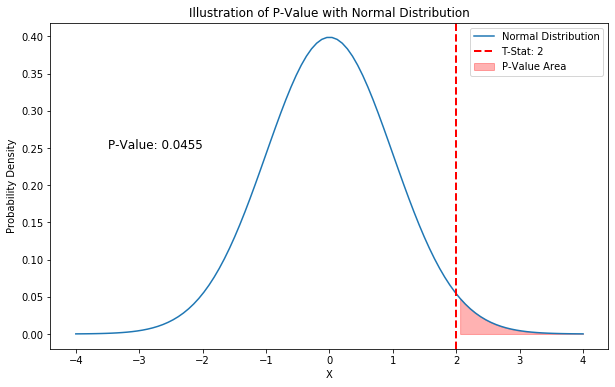

In [4]:
fig_pval

The process is as follows.

We start off with the hypothesis (that we hope to contradict)
- that the true mean of $\Theta^*_j = 0$.

We then calculate how far our measured $\Theta^*_j \ne 0$ is from $0$.
- the farther away it is, the less likely it is that we will draw $\Theta^*_j \ne 0$ from the zero-mean distribution

If it is very unlikely (e.g., with probability $p$ a small number)
- then we **reject** our hypothesis that the true mean of $\Theta^*_j = 0$
- **accept** our measured $\Theta^*_j \ne 0$ as being *significantly different than 0*
    - hence: there **is** a true relationship between $\y$ and $\x_j$
- and **we will be wrong in doing so** with  probability no greater than $p$



This gives us a basis for deciding 
- whether to accept
- that there is a true non-zero relationship between target $\y$ and feature $\x_j$

We should include features $\x_j$
- when the probability of being wrong in accepting the relationship to $\y$
- is small

The *t-stat* and *p-value* are computed values that express different ways
- of allowing us to accept that our measured $\Theta^*_j \ne 0$
- is significantly different than 0
- and hence, we should accept that $\y$ is truly related to $\x_j$

Given a particular estimate $\Theta^*_j$ from our fitting
- we measure its distance from 0, called the *t-stat*
- expressed in units of "number of first moments" 
    $$
    t_j = \frac{\Theta^*_j}{\sigma_j}
    $$

The *p-value* is the probability of drawing the measured $\Theta^*_j \ne 0$ from a zero-mean distribution.

So, it is *possible* to draw  $\Theta^*_j \ne 0$ from a zero-mean distribution
- but only with probability $p$

By rejecting the hypothesis that $\Theta^*_j = 0$ 
- and accepting a relationship between $\y$ and $\x_j$
- we will be *wrong* with probability $p$



Thus
- the *t-stat*
- and *p-value*

are complementary ways of allowing us to accept that $\y$ and $\x_j$ are truly related.

In the diagram above, you can observe (for a Normal distribution) the
- t-stat
- p-value

In general, it might be best
- to exclude $\x_j$ from the model
- if the probability of it **not** being significantly different than zero is too large.
    - low t-stat
    - large p-value

In [5]:
print("Done")

Done
